In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import operator
import os
import sys
sys.path.insert(0, '../modules/')

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

In [2]:
text_list = read_text_folder("./datasample/")
print("document number:", len(text_list))

document number: 88


In [3]:
texts = os.listdir('./datasample')
#texts

In [4]:
corpus = []
for text in texts:
    with open('./datasample/{}'.format(text),'r',encoding = 'utf-8') as file:
        corpus.append(file.read())

In [5]:
jieba.load_userdict("add_dict.txt")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.690 seconds.
Prefix dict has been built succesfully.


In [6]:
#def add_word(list):
   # for items in list:
   #     jieba.add_word(items)

#add_word(['太平山頂','纜車','凌霄閣','杜莎夫人蠟像館','阿甘蝦餐廳','維多利亞港','幻彩詠香江','張寶仔號','星光大道','迪士尼樂園','燈光秀','海洋公園','廟街夜市','男人街','周星馳','食神','旺角女人街','波鞋街','金魚街','西洋菜南街','昂坪360','纜車','昂坪市集','天壇大佛','水晶車','大澳','大嶼山','蘭桂坊','中環半山扶手電梯','重慶森林','王菲','石板街','砵典乍街','色戒','十月圍城','無間道','龍鳳鬥','泰昌餅家','蘭芳園','絲襪奶茶','中環','嘉咸街壁畫','壁畫','甄子丹','劉德華','追龍','功夫','九龍城寨','塗鴉藝術','天際100','灣仔','金紫荊廣場','時代廣場','鵝頸橋','跑馬','地馬場','尖沙咀','1881 Heritage','1881Heritage','半島酒店','海港城','女人街','朗豪街','旺角','東湧','東薈城','怪獸大廈','春秧街市場','春秧街','鴨寮街','美荷樓','黃大仙祠','彩虹邨','大澳漁村','南丫島','赤柱市集','美利樓','鴨靈號','澳門','九龍','奶油豬仔包','花園街','流沙包','炭烤燒肉','太平山夜景','觀景台','阿甘蝦','豬扒包','生煎包','恆香老婆餅','大館','檀島咖啡','甘牌燒鵝','宜必思酒店','蓮香居','港幣','來回機票','電子港簽','台胞證','中環','銅鑼灣','新界','叮叮車','上環','金鐘','灣仔','天后','的士','八達通卡','油麻地','九龍尖沙咀','紅勘','李嘉欣','The One百貨','TheOne百貨','THEONE百貨','theone百貨','K11商場','龍城大藥房','翠華餐廳','至潮魚蛋','太子','雞仔餅','紅豆燒餅','奇趣餅家','冰火菠蘿油','金華冰廳','燒汁釀茄子','菠蘿油','鴨肉火肉飯','太平山','阿甘正傳','郭富城','阿甘蝦美式餐廳','沾仔記雲吞麵','海山樓','192層蛋塔','近郊','巧克力博物館','黃竹坑站','食神','禮頓道站','跑馬地總站','西港城','生記粥品','新記車仔麵','鵝頸橋打小人','沙田賽馬場','黃大仙','黃大仙廟','深水埗站','深水埗','天星小輪','天星碼頭','欣澳站','迪士尼','赤柱','西貢','地質公園','全記海鮮','松記車仔麵','長洲','張保仔號','張保仔洞','興樂菜館','新照記魚丸','超人氣','香港旅遊發展局','旅遊發展局','網路','熱搜','精選','分享文','選出','自由行','彙整','省錢','快速通關','住宿地','路線','風情','相當','龐大','一律','開始','插座','天王','寫','哈','車廂','包廂','TOP','Top','大量','排隊','詳細','香港','paula','CDATA','googleadclientcapub8969488696235010','33642280','googleadslot8177660368','googleadwidth336','googleadheight280CDATA','netsunlight0324CM199229823','googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250','套餐', '看起來','來的及','搭地鐵','Day','day','DAY','起飛前','港幣','懷舊','費用','多數','那先來','三天','解釋','費用','機票','好','來','這地區','此文','你','住','別忘記','每天','好戲','滿快','懂','誤認','一站','划算','如果','每天','畢竟','最好','都爹利街','渡輪','最','西邊','東邊','南邊','北邊','分店','搭乘','精品','從','不是','女友','接駁','趴','捆','這萬象','不是','通','八達通','用','登機','女生','或許','免稅','男性','驚覺','依賴','站名','用','眾人','右上角','擷取','分享','不過','遊客','延伸','閱讀','為上','因為','看','提供','只要','航班','篇','還是','朋友','主要','很多','不能','交通','標準','雙人','客房','客房','優惠','手軟','面積'])

In [7]:
stopWords=[]
with open('stop_dict.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [8]:
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopWords)

In [9]:
#stopwords = ['kk','KK','Kk','索取','套票','標準','雙人','客房','客房','優惠','，','竟然','完美','旅客','能力','來的及','成人','幾站','非吃不可','緊張','的','應該', '會','錯過','時間','根本','不曉得','面積','手軟','就','都','選擇', '套餐', '看起來','...','多麼','甚至', '就是','而且', '一樣','當然','體驗','只是','.','特色','這裡','下車','走', '、','?','!',',','在','她','厲害','Commonroom','Day','day','DAY','全日','失敗','但','少','多','印象','近距離','除了','美食','台灣','市區','？', '唷','可以','很','！','，','。','的', '是', '在', '有', '就', '獲', '不' , '會', '若', '而', '這', '該', 'ETtoday', '被' , '那個' , '...' ,'klook','Klook','kkday','Kkday','大','便宜','票券','票價','門票','推薦','地圖','啊','吧','大概','好像','忘記','香港','文章','波比','那些','攻略','答案','這些','或許','要馬','了','啦','還有','哪裡','哪些','大概','或者','根據','都','整理','PDF','超人氣','哪','旅遊景點','景點','旅遊','發展','諸多','程度','排名','熱搜','一定','以及','亦','以','與','精選','分享文','選出','必去','必買','買','搶先','最','更','自由行','附上','所有','去','到','抵達','玩','出來','行程','比價','安排','大家','優惠','事項','搶','方便','這份','拿','一次','一起','趕緊','彙整','百萬','我們','省錢','快速通關','處','世界','住宿地','住宿','地','地方','於','活動','著','含','更新','懶人包','私房','也','超詳細','規劃','又','這也','用品','路線','碧海','非常','風情','相當','龐大','一律','開始','插座','天王','寫','哈','機票','大補帖','總','顯示','目前','幾次', '車', '電子港簽','正式', '怎樣','車廂','搞定', '窺','包廂','無','和','游','TOP','Top','大量','排隊','往','狠','一日','大多','短短','回顧','完善','之旅','幾家','路程','這樣','硬性','詳細','超','香港','paula','CDATA','googleadclientcapub8969488696235010','33642280','googleadslot8177660368','googleadwidth336','googleadheight280CDATA','netsunlight0324CM199229823','googleadregiontestgoogleadclientcapub1821908196508192googleadhostcahostpub7449992691305813googleadhostchannel2092664859googleadslot2579265263googleadwidth300googleadheight250','交通工具','大部分','預辦','收費','跟','說','網頁','血拼','機場','免費','確認','真的','人','上手','搭地鐵','起飛前','港幣','懷舊','費用','多數','那先來','三天','解釋','費用','機票','好','來','這地區','此文','你','住','別忘記','每天','好戲','滿快','懂','誤認','一站','划算','如果','每天','畢竟','最好','最','西邊','東邊','南邊','北邊','分店','搭乘','精品','從','不是','女友','接駁','趴','捆','這萬象','不是','通','用','登機','女生','或許','免稅','男性','驚覺','依賴','站名','用','眾人','右上角','擷取','分享','不過','遊客','延伸','閱讀','為上','因為','看','提供','只要','航班','篇','還是','朋友','主要','很多','不能','交通']
#dwc = count_words_in_documents(doc_list = text_list,
#                              doc_names = range(len(text_list)),
#                              stopwords = stopwords)

In [10]:
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#sorted(list(doc_word_frequency[7].items()) , key = lambda x: x[1] , reverse=True)[0:20] # 顯示第一篇文章的部份詞彙與對應詞頻
#for i in range (len(text_list)):
   # l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
#print(l_d)

In [11]:
for i in range (len(text_list)):
    l_d = sorted(list(doc_word_frequency[i].items()) , key = lambda x: x[1] , reverse=True)
print(l_d)


[('糖朝', 10), ('中', 4), ('不', 4), ('芝麻糊', 4), ('口味', 3), ('菜色', 3), ('港式', 3), ('脆', 3), ('蔔', 3), ('太', 2), ('已經', 2), ('有點', 2), ('餐廳', 2), ('一貫', 2), ('古典', 2), ('粥品', 2), ('艇仔粥', 2), ('白粥', 2), ('粥', 2), ('滑', 2), ('配著', 2), ('口感', 2), ('喔', 2), ('嫰', 2), ('美味', 2), ('外皮', 2), ('蘿', 2), ('酥皮', 2), ('豆腐花', 2), ('\ufeff', 1), ('九龍尖沙咀', 1), ('TheSweetDynasty', 1), ('多年', 1), ('未曾', 1), ('香江', 1), ('懷念', 1), ('滋味', 1), ('台', 1), ('設店', 1), ('口袋', 1), ('名單', 1), ('之一', 1), ('原因', 1), ('簡單', 1), ('常年', 1), ('吃慣', 1), ('萬', 1), ('花筒', 1), ('覺得', 1), ('小小', 1), ('不同', 1), ('再者', 1), ('這回', 1), ('停留', 1), ('不長', 1), ('習慣', 1), ('找', 1), ('尋周邊', 1), ('比較', 1), ('中位', 1), ('廣東道', 1), ('馬', 1), ('可', 1), ('孛', 1), ('羅', 1), ('對面', 1), ('改為', 1), ('藏身', 1), ('漢口', 1), ('小巷', 1), ('地下室', 1), ('位置', 1), ('小小的', 1), ('店面', 1), ('眼睛', 1), ('不睜大點', 1), ('還差點', 1), ('走過', 1), ('了頭', 1), ('以前', 1), ('雄偉', 1), ('大門', 1), ('整棟', 1), ('豪華氣勢', 1), ('差多', 1), ('帶著', 1), ('期待', 1), ('心情', 1), ('下手', 1), ('扶梯

In [12]:
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [13]:
# 查詢斷完詞後的 list 
corpus_cut = [jieba.lcut(t) for t in corpus]
#corpus_cut

#文章數量要夠多才能用
#sorted_d = sorted(doc_word_frequency.items(), key=operator.itemgetter(1), reverse = True)

檢查字典
利用coshow

In [14]:
##a = [[1, 2], [3, 4]] 大概是這概念
cut = [i for sublist in corpus_cut for i in sublist]
new_dic = []
for i in range(len(cut) - 1):
    assemble_word = cut[i]+cut[i+1]
    new_dic.append(assemble_word)
    #print(cut[i]+cut[i+1])
#    print(assemble_word)
#    #print(new_dic)

In [15]:
#def add_word(list):
#    for items in list:
#        jieba.add_word(items)
#add_word(new_dic)

In [20]:
#doc_names = range(len(text_list))
#dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}

In [21]:
#doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻
#sorted(list(doc_word_frequency[0].items()) , key = lambda x: x[1] , reverse=True)

In [16]:
# 斷詞後的 list 變成用空格把每個詞分開的形式
corpus = [' '.join(lcut) for lcut in corpus_cut]
# 可以接到 apriori 的過程

In [17]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,很厚實,聯票,Moovit,Ibis,朝外,三袋,帶貴,戚風,中學,站終,...,處過,自紀念,許多國旗,慫恿,開立戶,奮力,這感,租滿,印良品,必然
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
# df_tfidf = evaluate_tfidf(wfm)

,很厚實,聯票,Moovit,Ibis,朝外,三袋,帶貴,戚風,中學,站終,...,處過,自紀念,許多國旗,慫恿,開立戶,奮力,這感,租滿,印良品,必然
0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.00000,0.0,0.111679,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.02836,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
5,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
6,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
7,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.04672,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
8,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
9,0.0,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.00000,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0


In [19]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('很厚實', 0.0),
 ('聯票', 0.0),
 ('Moovit', 0.0),
 ('Ibis', 0.0),
 ('朝外', 0.0),
 ('三袋', 0.0),
 ('帶貴', 0.0),
 ('戚風', 0.0),
 ('中學', 0.0),
 ('站終', 0.0)]

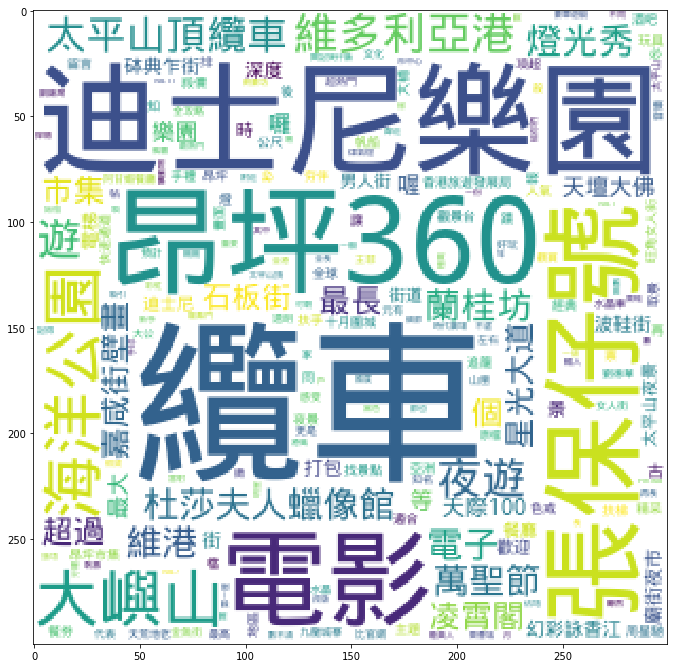

In [22]:
linux_font = r'/Users/User/Documents/GitHub/project/FinalProject/wqy-microhei.ttc'
#linux_font = r'/Users/Minerva/Documents/GitHub_table_computer/in_home/FinalProject/wqy-microhei.ttc'
#記得自行需要下載，與修改路徑 
plt.figure(figsize=(25, 20))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)


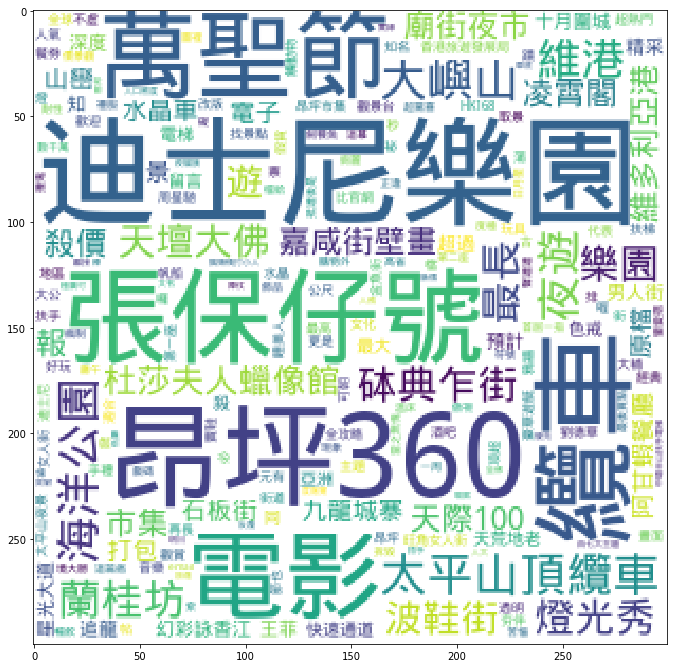

In [23]:
#修正過後
plt.figure(figsize=(25, 20))
ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)

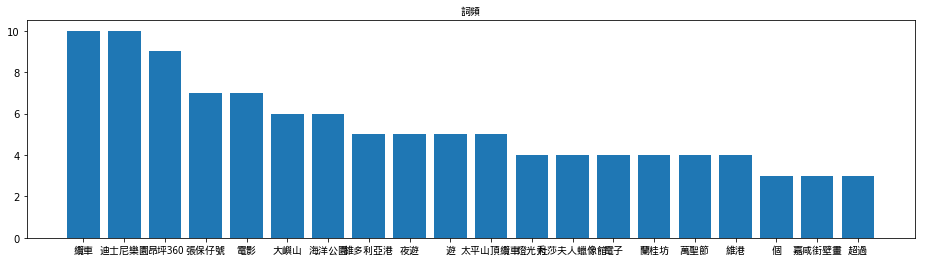

In [24]:
plt.figure(figsize=(35, 4))
ax1 = plt.subplot(121)
plot_tf_bar(first_text, ax=ax1, font_path=linux_font, title="詞頻")

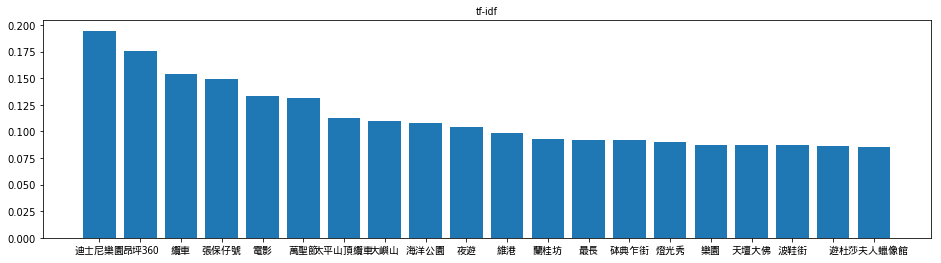

In [25]:
#修正過後
plt.figure(figsize=(35, 4))
ax2 = plt.subplot(122)
plot_tfidf_bar(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, title="tf-idf")